<a href="https://colab.research.google.com/github/ketanp23/sit-neuralnetworks-class/blob/main/KAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch demo: Train 1-hidden-layer NN to approx f(x,y) = sin(πx) * cos(πy) (multivariate).

Result: Near-perfect fit! Shallow NN ≈ complex function.

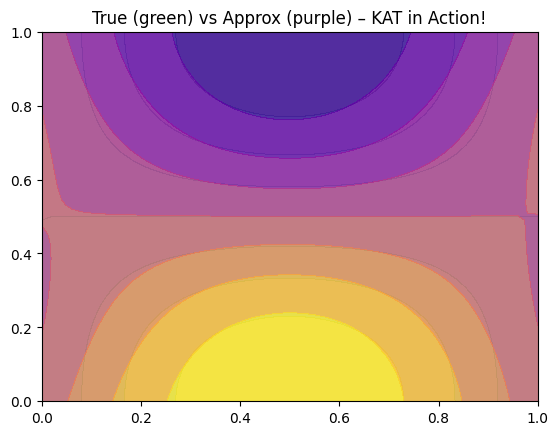

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Target: f(x,y) = sin(πx) * cos(πy)
def true_func(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

# Data: 1000 points in [0,1]x[0,1]
x = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X = np.hstack((x, y))
target = true_func(x, y).reshape(-1, 1)

X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(target, dtype=torch.float)

# Shallow NN (KAT-inspired: 1 hidden layer, 20 neurons)
class ShallowApprox(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 20)  # Inner sums via linear
        self.output = nn.Linear(20, 1)  # Outer Φ

    def forward(self, x):
        x = torch.tanh(self.hidden(x))  # Univariate-like activation
        return self.output(x)

model = ShallowApprox()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train
for epoch in range(2000):
    optimizer.zero_grad()
    pred = model(X_tensor)
    loss = criterion(pred, y_tensor)
    loss.backward()
    optimizer.step()

# Plot (test grid)
xx, yy = np.meshgrid(np.linspace(0,1,50), np.linspace(0,1,50))
test_X = np.c_[xx.ravel(), yy.ravel()]
test_pred = model(torch.tensor(test_X, dtype=torch.float)).detach().numpy().reshape(50,50)

plt.contourf(xx, yy, true_func(xx,yy), alpha=0.5, cmap='viridis')
plt.contourf(xx, yy, test_pred, alpha=0.7, cmap='plasma')
plt.title("True (green) vs Approx (purple) – KAT in Action!")
plt.show()